# NaiveIdentifier: Test

In this notebook, we test our implementation of a basic language identifier using __naive bayes__. The goal is primarily to ensure we understood how the langid works.  


## About our model

The naive bayes model works like this.

During __training__, we create one vectorizer per language. This vectorizer can be an instance of the scikit learn `TfIdfVectorizer` or any other implementation (for example our `NaiveVectorizer`). The important thing is that it defines a `fit` and a `transform` method.

To __predict__ the language of a new sentence, we compute a score for each language we know and then return the one with the "highest" score. This language score is computer as such:

- transform the sentence into a document-ngram matrix using the vectorizer created by fit
- apply the logarithm to every cell != 0
- sum the logs

In other words: sum the posterior probabilities of each ngrams in the sentence given the current language.

__Important__: here, we _do not_ sanitize the data. Better results might thus be achieved by removing punctuation and other non-words from the samples.

## Loading data

In [1]:
%run notebook_utils.py

In [2]:
import matplotlib
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [3]:
X_train, X_test, y_train, y_test = load_split_data()
X_valid, y_valid = load_validation_data()

## Importing the langid package

In [4]:
%cd ..
from langid import NaiveIdentifier, WrappedVectorizer, np_sanitize
%cd -

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


## Testing the NaiveIdentifier (trigrams, features=3000 per lang)

### Instantiate and train
Here, we decide to use the scikit vectorizer with the basic options.

In [5]:
clf = NaiveIdentifier() # use default options, i.e. TfIdfVectorizer with ngram_range=3, max_features=3000, tf, no idf

Fit using training data, then predict the language of our test and validation sets.

In [6]:
%%time
_ = clf.fit(X_train, y_train)

CPU times: user 9.32 s, sys: 345 ms, total: 9.66 s
Wall time: 9.68 s


### Evaluate on the test set

TEST SET
             precision    recall  f1-score   support

         de     0.9566    0.9938    0.9748      1462
         fr     0.9966    0.9980    0.9973      1468
         en     0.9871    0.9980    0.9926      1538
         it     0.9920    1.0000    0.9960      1482
         sg     0.9948    0.9339    0.9634      1438

avg / total     0.9854    0.9851    0.9850      7388



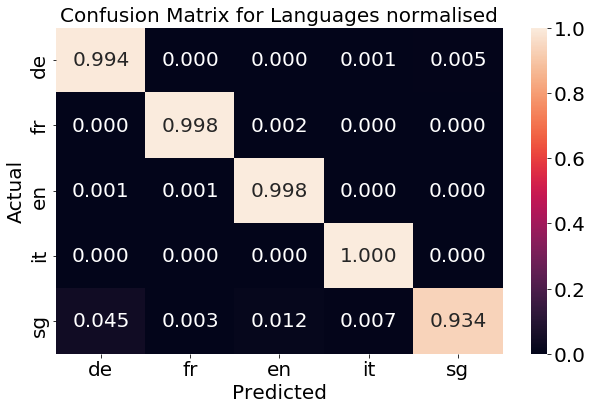

CPU times: user 6.92 s, sys: 113 ms, total: 7.03 s
Wall time: 7.07 s


In [7]:
%%time
print("TEST SET")
print("========")
y_pred = clf.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)


### Evaluate recall on the Swiss German SMS

In [8]:
%%time
print("SMS RECALL")
print("==========")
test_recall_with_sms(clf)

SMS RECALL
total samples    10692
total errors       431 (4.03%)
---------------------------------
languages detected
    de      306
    fr       29
    en       46
    it       50
    sg    10261
CPU times: user 8.53 s, sys: 80 ms, total: 8.61 s
Wall time: 8.61 s


### Evaluate on the validation set



VALIDATION SET
             precision    recall  f1-score   support

         de     0.9276    0.9946    0.9599      2613
         fr     0.9969    0.9981    0.9975      2613
         en     0.9928    0.9996    0.9962      2613
         it     0.9977    0.9985    0.9981      2613
         sg     0.9963    0.9154    0.9541      2613

avg / total     0.9822    0.9812    0.9812     13065



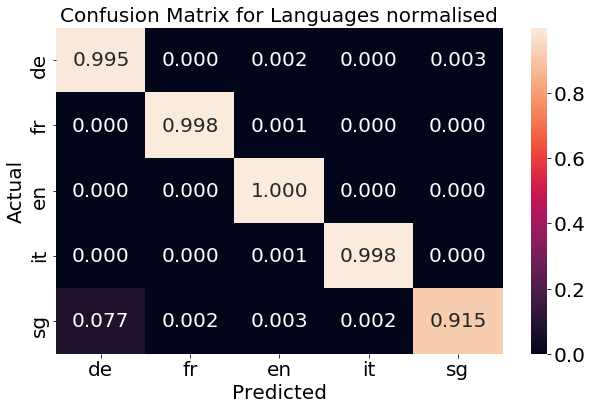

Errors per language:

  de:   14
  fr:    5
  en:    1
  it:    4
  sg:  221

Sample errors:

real|predicted  <sentence>
--------------------------
  sg|fr   Content-Length: 18734 Connection: close Cache-Control: private Geboren: 4.5.1825, Le Brassus VD Gestorben: 22.7.1913, Clarens VD Uhrmacherlehre im väterlichen Atelier im Vallée de Joux.
  sg|de   Geographical extent Berner Seeland zwischen Biel und Solothurn, östlich bis in der Gegend von Lyss (Übergang zu den Gümmenen-Schichten).
  sg|de   Gewicht: 780 g. Silberfarbener Metall-Dildo in konischer Form mit Reizkugel am Ende. 14 cm lang, Ø 1 cm bis 3,5 cm.
  sg|de   Siegfried Bodenmann, Departement Geschichte, Universität Basel lic. phil.
  sg|de   Freiburg i.Br: Arbeitskreis Regionalgeschichte Freiburg e. V. Freiburg i.Br., 2013.
  sg|de   Seit 2007 Mitglied der Stadtbildkommission des Kanton Basel Stadt.
  sg|de   Freut eim sälber.
  sg|de   Iiberhaupt nit anderscht..
  sg|de   Mitglied der Armenpflege 1915-24 und des Bezirksgeric

In [9]:
print("\n\nVALIDATION SET")
print("===============")
y_pred = clf.predict(X_valid)
print_results(y_valid, y_pred)
plot_confusion_matrix(y_valid, y_pred, normalised=True)

print_errors_per_lang(y_valid, y_pred)
print_sample_errors(X_valid, y_valid, y_pred, limit=30)

## Using less features

TEST SET
             precision    recall  f1-score   support

         de     0.9349    0.9822    0.9580      1462
         fr     0.9919    0.9980    0.9949      1468
         en     0.9833    0.9980    0.9906      1538
         it     0.9880    1.0000    0.9940      1482
         sg     0.9825    0.8978    0.9382      1438

avg / total     0.9762    0.9758    0.9755      7388



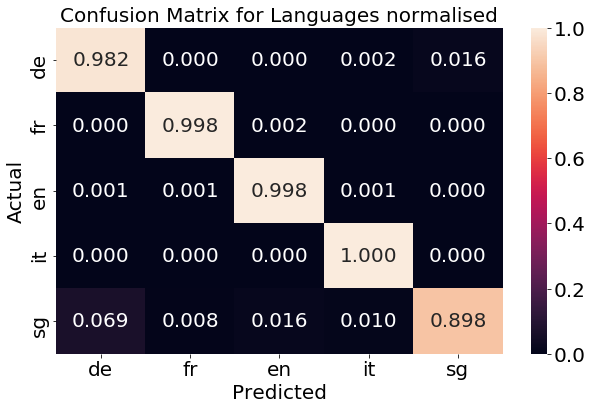

SMS RECALL
total samples    10692
total errors       800 (7.48%)
---------------------------------
languages detected
    de      592
    fr       48
    en       84
    it       76
    sg     9892


VALIDATION SET
             precision    recall  f1-score   support

         de     0.9106    0.9790    0.9436      2613
         fr     0.9943    0.9966    0.9954      2613
         en     0.9913    0.9985    0.9949      2613
         it     0.9943    0.9977    0.9960      2613
         sg     0.9807    0.8944    0.9355      2613

avg / total     0.9742    0.9732    0.9731     13065



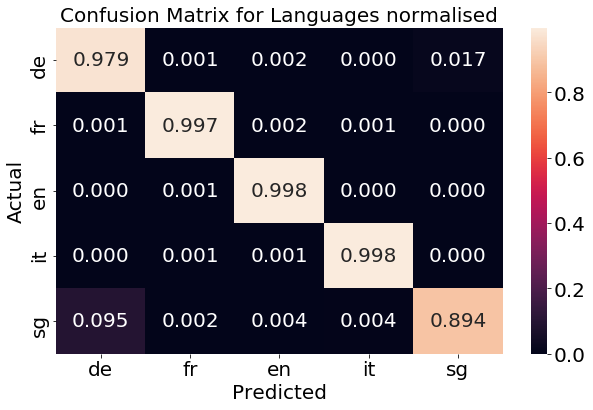

Errors per language:

  de:   55
  fr:    9
  en:    4
  it:    6
  sg:  276

Sample errors:

real|predicted  <sentence>
--------------------------
  de|sg   Weitere Hauptfiguren sind die Rektorin P.J. Moore und Marks Schüler Earvin.
  sg|de   Drufaabe hänn dr Stamm und die Alte zämme der Wienachtsstamm deerfe gniesse.
  sg|de   Ferienwohnung im OrtObjekt 5142 in Ort Tisno, Murter - Nordd..
  de|sg   Martin verfällt ihr mit der Zeit immer mehr, schläft mehrfach am Tag mit ihr und bewacht ihr Privatleben obsessiv.
  sg|de   Veröffentlicht am 19. Mai 2013 von admin Dir heit üs ä fantastische Geburtstag beschert u üs e huere Freud gmacht mit däm Fescht geschter, danke!
  sg|de   In Neue Zürcher Zeitung.
  sg|fr   Si säge «mir ou».
  sg|de   Gerlinde Huber-Rebenich LV 6/8: Übung zur Vorlesung: Geschichte der lateinischen Sprache: Antike bis Humanismus.
  de|sg   Artikel vom 6. Oktober, abgerufen am 7. Oktober 2015.
  de|sg   Laterale Äquivalente sind im Südwesten die Supai-Gruppe im Grand 

In [10]:
clf = NaiveIdentifier(max_features=600) 
clf.fit(X_train, y_train)


print("TEST SET")
print("========")
y_pred = clf.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")
test_recall_with_sms(clf)

print("\n\nVALIDATION SET")
print("===============")
y_pred = clf.predict(X_valid)
print_results(y_valid, y_pred)
plot_confusion_matrix(y_valid, y_pred, normalised=True)

print_errors_per_lang(y_valid, y_pred)
print_sample_errors(X_valid, y_valid, y_pred, limit=30)

# Plotting the number of features

In [11]:
import sklearn.metrics
import numpy as np

feature_sizes = [100, 500, 700, 1000, 5000, 10000] 
accuracies = []
f1_scores = []
precisions = []
recalls = []

labels = [None] + [[i] for i in range(len(langs))]

for i in feature_sizes:
    clf = NaiveIdentifier(max_features=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    
    f1_scores.append([ metrics.f1_score(y_test, y_pred, average="macro", labels=i) for i in labels ])    
    precisions.append([ metrics.precision_score(y_test, y_pred, average="macro", labels=i) for i in labels ])
    recalls.append([ metrics.recall_score(y_test, y_pred, average="macro", labels=i) for i in labels ])

In [12]:
f1s = np.array(f1_scores)
precs = np.array(precisions)
recs = np.array(recalls)

In [13]:
langs

['de', 'fr', 'en', 'it', 'sg']

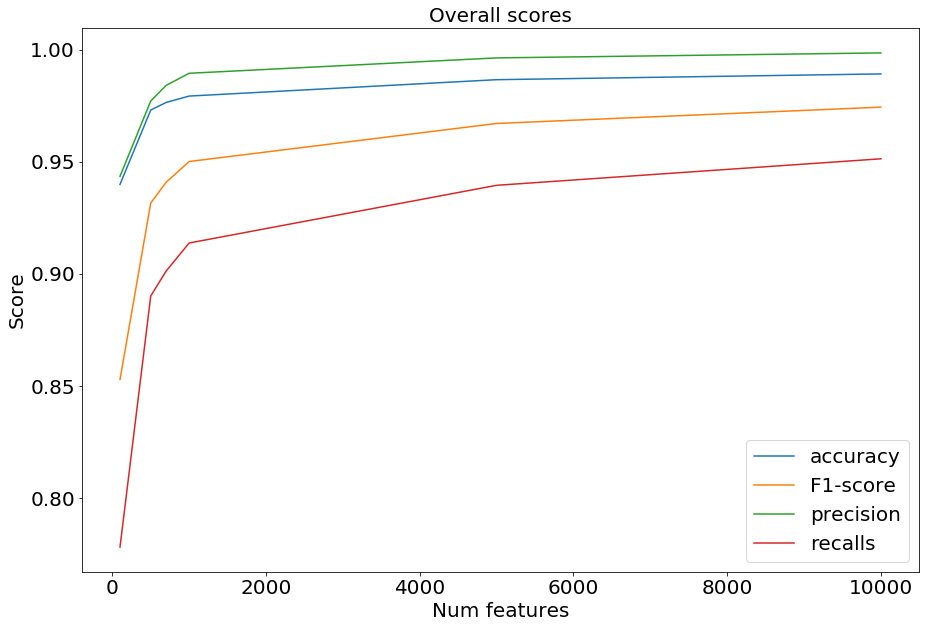

In [14]:
plt.figure(figsize=(15,10))

lg = 5
plt.plot(feature_sizes, accuracies, label="accuracy")
plt.plot(feature_sizes, f1s[:,lg], label="F1-score")
plt.plot(feature_sizes, precs[:,lg], label="precision")
plt.plot(feature_sizes, recs[:,lg], label="recalls")

plt.title("Overall scores")
plt.xlabel("Num features")
plt.ylabel("Score")

_ = plt.legend()

In [15]:
list(zip(langs, range(1, len(langs)+1)))

[('de', 1), ('fr', 2), ('en', 3), ('it', 4), ('sg', 5)]

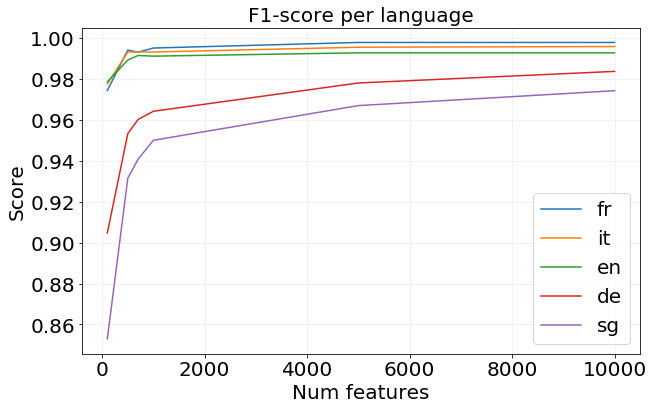

In [16]:
plt.figure(figsize=(10,6))

#plt.plot(feature_sizes, f1s[:,0], label="F1-score")
for i in [2,4,3,1,5]:
    plt.plot(feature_sizes, f1s[:,i], label=langs[i-1])
    #plt.plot(feature_sizes, precs[:,lg], label="precision [%s]" % langs[i-1])

plt.grid(c="#efefef")
plt.xlabel("Num features")
plt.ylabel("Score")
plt.title("F1-score per language")
_ = plt.legend()

## Conclusion

As you can see, the results are pretty good: for Swiss German sentences, the f1 score on the test set is ~ 98% !

However, by running the model on the SMS validation set, we can see that Swiss German and Standard German are often confused. More surprising, english is also difficult to predict.